# Market Basket Analysis(MBA) / Association Rule

**Market basket analysis** is the study of relationships between various products and products that are purchased together in a series of transactions or discover actionable insight in transaction datasets.  Association rules or just rules are statements which have a left-hand side (LHS) and a right-hand side (RHS), which indicates that if we purchase items on the LHS, we are likely to be interested in purchasing the RHS items too. This implies that the itemsets are associated with each other. <br>Association rule can be denoted by using the notation, { beans, Milk } -> { tea } which would indicate that if I am buying beans and Milk together, I am most likely to also purchase tea along. There are three common ways to measure association, these are Support, Confidence and Lift.

Before we proceed,an itemset in the context of MBA is defined as a collection of items bought together.

**Support** of an association rule of an itemset is defined as the number of times an itemset was purchased divided by the total number of transaction in the dataset. It is measured by the proportion of transactions in which an itemset appears or the number of times an item appeared in a transaction set divided by the total number of transactions<br><br>

**Confidence** of an association rule of an itemset is defined as the probability that for a new transaction containing the an itemset on the LHS of the rule, the transaction also contains the itemset on the RHS of the rule or simply put, how likely item Y is bought when item X is bought. This is expressed as the support of items X and Y divided by the support of item X<br>
>**Note:** One very big drawback of this measure is that Confidence{X -> Y} is not equal Confidence{Y -> X}<br><br>

**Lift** of  an association rule is defined as the ratio of the support of the combination of two itemset on the RHS and LHS together divided by the product of the support of each of the itemset.<br><br>


>**Lift > 1** indicates the presence of the itemset in the LHS is responsible for the increase in the probability that the customer is also going to buy the itemset on the RHS.<br><br>


>**Lift = 1** indicates that the itemset on the LHS and RHS are independent<br><br>


>**Lift < 1** indicates that a customer having an itemset on the LHS has a very low probability that they will buy itemset on the RHS<br><br>

Note: The higher the support value the better<br>
Note: support is more about measuring the quality of rules detecting what has already happened from the past transactions.<br>
Note: confidence is all about detecting the quality of rules predicting the future.<br>
Note: Lift is a metric to evaluate the quality of a rule.

#### Various Application

- Health Care Sector
- Retail and E-commerce
- Banking and Finacial services, etc

#### Data Requirements
In real world cases, dataset would need to be converted to a transactional format for MBA to be applied. The arules library provides functions to read transaction from a dataframe, this function provides two options, **Single** and **Basket**.<br>

>In single format, each line represents a singlr item while in basket format each line is made up of item levels and separated by comma, tab or space. I would now demonstrate how to transform raw dataset using the both format to be in transactional form

#### Create a Basket format transaction data

In [1]:
# Let's create a fake transaction with five baskets.
# each line represents what a person had picked in
# a shop, for instance, the first basket does imply the person
# bought Milk, Beans and Bread. The second person bought Soda and Bread, etc.
raw_data <- paste(
    "Milk,Beans,Bread",
    "Soda,Bread",
    "Bread, jam",
    "Bread",
    "Butter,Orange,Banana", sep="\n")

# lets view the data. In real world, this is the format you might find your data, may be with
# some additional fields/columns. But importanly, the basket content session is what you would
# need for MBA
cat(raw_data)

Milk,Beans,Bread
Soda,Bread
Bread, jam
Bread
Butter,Orange,Banana

In [3]:
# let use write this file and import
# Did you notice something different from the usual way of writing data to file?
# What we did in the code below is just fine as well.
write(raw_data, file = "basket_formated_file")

In [4]:
# You would need to install the arules package to run the code below
# install.packages("arules")
library(arules) # this package is required for the read.transactions() function
# as well as the apriori function which will be required later for building the 
# transaction rules

# read in the raw dataset and convert to appropirate format
transaction_data <- read.transactions("basket_formated_file", format = "basket", sep=",,")

# to view a transaction data, the head() function would not return the desired output
# instead, use inspect() function
inspect(transaction_data)

    items                 
[1] {Beans,Bread,Milk}    
[2] {Bread,Soda}          
[3] {Bread,jam}           
[4] {Bread}               
[5] {Banana,Butter,Orange}


In [ ]:
# Note how the respective item in the baskets are 
# wrapped with curly brackets. This is the format a transaction dataset 
# should be in for use in the apriori function.

#### create a Single format transaction data

In [5]:
# We repeat the the same process as above but this time
# the items are split per row?
# Did you spot the difference between the set of data and the one just created above?
raw_data0 <- paste(
    "transaction1 Milk",
    "transaction1 Beans",
    "transaction1 Bread",
    "transaction2 Soda",
    "transaction2 Bread",
    "transaction3 Bread",
    "transaction3 jam",
    "transaction4 Bread",
    "transaction5 Butter",
    "transaction5 Orange",
    "transaction5 Banana", sep="\n")

# lets view the data
cat(raw_data0)

transaction1 Milk
transaction1 Beans
transaction1 Bread
transaction2 Soda
transaction2 Bread
transaction3 Bread
transaction3 jam
transaction4 Bread
transaction5 Butter
transaction5 Orange
transaction5 Banana

In [6]:
# lets write this file and import
write(raw_data0, file = "single_formated_file")

In [6]:
# just as before, this library is required for the read.transactions() function
library(arules) 

# we convert the dataset to a transaction one. what is the difference between this line 
# of code and the one we used above? to start with, the format changed from braket to single
# and it does have an extra argument (cols), which tells the function to split the dataset into
# two columns
transaction_data0 <- read.transactions("single_formated_file", 
                                       format = "single", cols = c(1,2))

inspect(transaction_data0)

    items                  transactionID
[1] {Beans,Bread,Milk}     transaction1 
[2] {Bread,Soda}           transaction2 
[3] {Bread,jam}            transaction3 
[4] {Bread}                transaction4 
[5] {Banana,Butter,Orange} transaction5 


In [ ]:
# This output is almost exact with the one earlier created except that this one does 
# have an extra field called TransactionID. This can be removed as it's not required for MBA

### Hands-On
We will be working with an inbult R trandasction dataset called Groceries
We would investigate what products to recommend to shopper give what they have 
already put in their shopping carts. This sounds more like a process for only E-commerce
but the concept can be applied in various sectors

#### Load the required packages

In [9]:
library(arules) # use for apriori algorithms
library(arulesViz) # use for visualization
data(Groceries) # required dataset

# to view a transaction table always use inspect function and NOT the head() function
# inspecting the first 5 transactions
inspect(Groceries[1:5])

Warning message:
"package 'arulesViz' was built under R version 3.5.2"Loading required package: grid


    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}


#### Contigency matrix Analysis

In [11]:
# lets count based how often product were bought together(contigency matrix)
basket <- crossTable(Groceries, measure = "count", sort =T)

# view the contigency table
basket[1:8, 1:8]

,whole milk,other vegetables,rolls/buns,soda,yogurt,bottled water,root vegetables,tropical fruit
whole milk,2513,736,557,394,551,338,481,416
other vegetables,736,1903,419,322,427,244,466,353
rolls/buns,557,419,1809,377,338,238,239,242
soda,394,322,377,1715,269,285,183,205
yogurt,551,427,338,269,1372,226,254,288
bottled water,338,244,238,285,226,1087,154,182
root vegetables,481,466,239,183,254,154,1072,207
tropical fruit,416,353,242,205,288,182,207,1032


#### What does this table say?
The way to read this table is as follows.
From the transactions under review, Customers bought only Whole Milk 2513 times, Whole Milk and soda 394 times, etc. I have limited how much data is displayed for just demonstaration supposes
you could view more data by changing the values in next to the basket to any number, but would suggest to limit this number

In [12]:
# create a support based product contingency matrix, i.e, what is the proportion of items being bought together
basket <- crossTable(Groceries, measure="support", sort=T)

# view the data
basket[1:5, 1:5]

,whole milk,other vegetables,rolls/buns,soda,yogurt
whole milk,0.25551601,0.07483477,0.05663447,0.04006101,0.05602440
other vegetables,0.07483477,0.19349263,0.04260295,0.03274021,0.04341637
rolls/buns,0.05663447,0.04260295,0.18393493,0.03833249,0.03436706
soda,0.04006101,0.03274021,0.03833249,0.17437722,0.02735130
yogurt,0.05602440,0.04341637,0.03436706,0.02735130,0.13950178


#### What does this table imply?
It simply means that only Whole Milk make up approximately 26% (0.25551601 x 100) of the entire transactions, Whole Milk and Soda combined make approximately 4% of the entire transactions, etc.

In [13]:
# let us see what product are strongly likely to be bought together
# if lift is > 1 the stronger the chance of both product being bought together
basket <- crossTable(Groceries, measure = "lift", sort = T)

# view the datas
basket[1:5, 1:5]

,whole milk,other vegetables,rolls/buns,soda,yogurt
whole milk,NA,1.5136341,1.205032,0.8991124,1.571735
other vegetables,1.5136341,NA,1.197047,0.9703476,1.608457
rolls/buns,1.2050318,1.1970465,NA,1.1951242,1.339363
soda,0.8991124,0.9703476,1.195124,NA,1.124368
yogurt,1.5717351,1.6084566,1.339363,1.1243678,NA


#### What does the contigency table for Lift imply?

#### What do you think about the contigency tables?

**Pros:**<br>
- It gives a very quick overview of the transactions<br>

**cons:**<br>
- Matrix is too large and difficult to work.<br>
- Faces the cold start problem

#### Apriori Method

In [14]:
# view the top ten purchased products
freq_items <- sort(itemFrequency(Groceries, type="absolute"), decreasing=T)
freq_items[1:10]

whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt    bottled water  root vegetables   tropical fruit 
            1372             1087             1072             1032 
   shopping bags          sausage 
             969              924

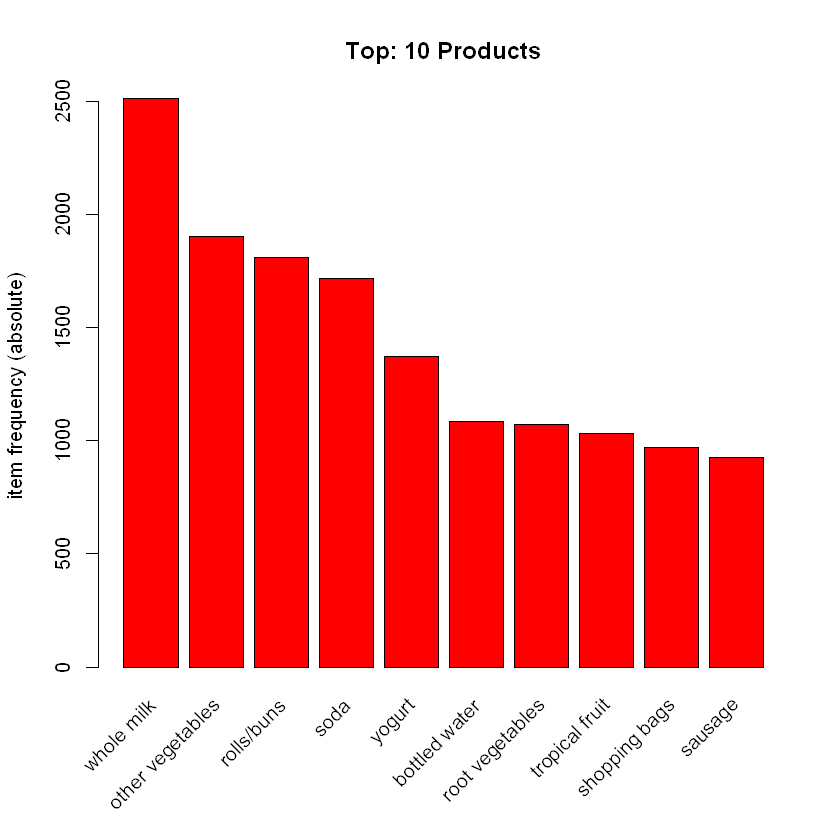

In [15]:
# visualizing the top ten purchased products
top <- 10
itemFrequencyPlot(Groceries, topN = top, type="absolute", main = paste("Top:",top, "Products"), col="red")

#### Normal workflow for generating association rules

In [7]:
# detecting and predicting shopping trends
param <- list(supp = 0.001, conf = 0.5, minlen=2)

rules<- apriori(Groceries, parameter = param)
inspect(rules[1:10])

ERROR: Error in apriori(Groceries, parameter = param): could not find function "apriori"


#### How to interpret the above output

Firstly observe the items on the LHS and the items on the RHS, and conclude that if a customer has added the item(s) from the LHS in his shopping cart, there is a chance of him also adding the item(s) on the RHS. 

From the first line, we can say that there is a 73.3% confidence that if a customer buys honey, he will also buy whole milk, though I do not recommend using just Confidence values to interpret how good the rules are, I had used this for this instance because it does have a **Lift value greater than 1**

In [17]:
# remove duplicates in the transactions using this helper function
remove.dup.rules <- function(rules){
    rules.subset.matrix<- is.subset(rules, rules)
    rules.subset.matrix[lower.tri(rules.subset.matrix, diag=T)]<- NA
    dup.rules <- colSums(rules.subset.matrix, na.rm=T) >= 1
    pruned.rules <- rules[!dup.rules]
    return(pruned.rules)
}

In [18]:
# now sort rules based on confidence
rules<- sort(rules, by="confidence", decreasing=T)
remove.dup.rules(rules)
inspect(rules[1:5])

Warning message in `[<-`(`*tmp*`, as.vector(i), value = NA):
"x[.] <- val: x is "ngTMatrix", val not in {TRUE, FALSE} is coerced; NA |--> TRUE."

set of 0 rules 

    lhs                     rhs              support confidence     lift count
[1] {rice,                                                                    
     sugar}              => {whole milk} 0.001220132          1 3.913649    12
[2] {canned fish,                                                             
     hygiene articles}   => {whole milk} 0.001118454          1 3.913649    11
[3] {root vegetables,                                                         
     butter,                                                                  
     rice}               => {whole milk} 0.001016777          1 3.913649    10
[4] {root vegetables,                                                         
     whipped/sour cream,                                                      
     flour}              => {whole milk} 0.001728521          1 3.913649    17
[5] {butter,                                                                  
     soft cheese,                                   

In [19]:
# now sort rules based on lift
rules<- sort(rules, by="lift", decreasing=T)
remove.dup.rules(rules)
inspect(rules[1:5])

Warning message in `[<-`(`*tmp*`, as.vector(i), value = NA):
"x[.] <- val: x is "ngTMatrix", val not in {TRUE, FALSE} is coerced; NA |--> TRUE."

set of 0 rules 

    lhs                                   rhs              support    
[1] {Instant food products,soda}       => {hamburger meat} 0.001220132
[2] {soda,popcorn}                     => {salty snack}    0.001220132
[3] {flour,baking powder}              => {sugar}          0.001016777
[4] {ham,processed cheese}             => {white bread}    0.001931876
[5] {whole milk,Instant food products} => {hamburger meat} 0.001525165
    confidence lift     count
[1] 0.6315789  18.99565 12   
[2] 0.6315789  16.69779 12   
[3] 0.5555556  16.40807 10   
[4] 0.6333333  15.04549 19   
[5] 0.5000000  15.03823 15   


####  Detecting specific shopping patterns 

In [32]:
# Now we find itemset which lead to buying of an item on the RHS, we consider "soda"
param2 <- list(supp = 0.001, conf = 0.5, minlen=2)
rules <- apriori(Groceries, parameter = param2, 
                appearance = list(default="lhs", rhs="soda"),
                control = list(verbose=F))

In [33]:
# The output shows that people who purchased soda will most likely buy the items on the LHS
remove.dup.rules(rules)
rules<- sort(rules, by="lift", decreasing=T)
inspect(rules[1:5])

Warning message in `[<-`(`*tmp*`, as.vector(i), value = NA):
"x[.] <- val: x is "ngTMatrix", val not in {TRUE, FALSE} is coerced; NA |--> TRUE."

set of 0 rules 

    lhs                                             rhs    support    
[1] {coffee,misc. beverages}                     => {soda} 0.001016777
[2] {yogurt,rolls/buns,bottled water,newspapers} => {soda} 0.001016777
[3] {sausage,bottled water,bottled beer}         => {soda} 0.001118454
[4] {sausage,white bread,shopping bags}          => {soda} 0.001016777
[5] {rolls/buns,bottled water,chocolate}         => {soda} 0.001321810
    confidence lift     count
[1] 0.7692308  4.411303 10   
[2] 0.7692308  4.411303 10   
[3] 0.7333333  4.205442 11   
[4] 0.6666667  3.823129 10   
[5] 0.6500000  3.727551 13   


In [34]:
# finding items which are bought when we have an itemset on LHS
metric_params<- list(supp = 0.001, conf = 0.3, minlen=2)
rules<- apriori(Groceries, parameter = metric_params, 
                appearance = list(default="rhs", lhs= c("chocolate","rolls/buns")),
                control = list(verbose=F))

In [35]:
# THE output shows that people who purchased rolls/buns and chocolate will most likely buy the items on the RHS
remove.dup.rules(rules)
rules<- sort(rules, by="lift", decreasing=T)
inspect(rules[1:5])

Warning message in `[<-`(`*tmp*`, as.vector(i), value = NA):
"x[.] <- val: x is "ngTMatrix", val not in {TRUE, FALSE} is coerced; NA |--> TRUE."

set of 0 rules 

    lhs                       rhs                support     confidence
[1] {rolls/buns,chocolate} => {soda}             0.004067107 0.3448276 
[2] {rolls/buns,chocolate} => {other vegetables} 0.003863752 0.3275862 
[3] {rolls/buns,chocolate} => {whole milk}       0.004982206 0.4224138 
[4] {chocolate}            => {whole milk}       0.016675140 0.3360656 
[5] {rolls/buns}           => {whole milk}       0.056634469 0.3079049 
    lift     count
[1] 1.977481  40  
[2] 1.693016  38  
[3] 1.653179  49  
[4] 1.315243 164  
[5] 1.205032 557  


In [36]:
# visualizing association rules using arulesViz package
plot(rules, method="graph",  interactive= TRUE)

Warning message in plot.rules(rules, method = "graph", interactive = TRUE):
"The parameter interactive is deprecated. Use engine='interactive' instead."

# The End